In [4]:
import pandas as pd 
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro, probplot
from scipy.stats import levene
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import spearmanr

In [6]:
# Data importing and fixing

In [8]:
dataset, meta = pyreadstat.read_sav("10_satscore.sav")
print(dataset.head())
dataset.iloc[22]
dataset.loc[22, "COST"] = np.nan
dataset.loc[22, "RATIO"] = 17.500
dataset.loc[22, "SALARY"] = 35.948
dataset.loc[22, "PERCENT"] = 9.0
dataset.loc[22, "VERBAL"] = 506.0
dataset.loc[22, "MATH"] = 579.0
dataset.loc[22, "TOTAL"] = 1085.0

        STATE   COST  RATIO  SALARY  PERCENT  VERBAL   MATH   TOTAL
0     Alabama  4.405   17.2  31.144      8.0   491.0  538.0  1029.0
1      Alaska  8.963   17.6  47.951     47.0   445.0  489.0   934.0
2     Arizona  4.778   19.3  32.175     27.0   448.0  496.0   944.0
3    Arkansas  4.459   17.1  28.934      6.0   482.0  523.0  1005.0
4  California  4.992   24.0  41.078     45.0   417.0  485.0   902.0


In [10]:
# Descriptive statistics

In [24]:
dataset["SALARYCAT"] = pd.qcut(dataset["SALARY"], q = 4, duplicates = "drop")

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   STATE      50 non-null     object  
 1   COST       49 non-null     float64 
 2   RATIO      50 non-null     float64 
 3   SALARY     50 non-null     float64 
 4   PERCENT    50 non-null     float64 
 5   VERBAL     50 non-null     float64 
 6   MATH       50 non-null     float64 
 7   TOTAL      50 non-null     float64 
 8   SALARYCAT  50 non-null     category
dtypes: category(1), float64(7), object(1)
memory usage: 3.5+ KB


In [30]:
data = dataset.drop(columns = ["STATE", "SALARYCAT"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COST     49 non-null     float64
 1   RATIO    50 non-null     float64
 2   SALARY   50 non-null     float64
 3   PERCENT  50 non-null     float64
 4   VERBAL   50 non-null     float64
 5   MATH     50 non-null     float64
 6   TOTAL    50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [32]:
data.describe()

,COST,RATIO,SALARY,PERCENT,VERBAL,MATH,TOTAL
count,49.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.903327,16.858000,34.828920,35.240000,457.140000,508.780000,965.920000
std,1.376860,2.266355,5.941265,26.762417,35.175948,40.204726,74.820558
min,3.656000,13.800000,25.994000,4.000000,401.000000,443.000000,844.000000
25%,4.845000,15.225000,30.977500,9.000000,427.250000,474.750000,897.250000
50%,5.718000,16.600000,33.287500,28.000000,448.000000,497.500000,945.500000
75%,6.436000,17.575000,38.545750,63.000000,490.250000,539.500000,1032.000000
max,9.774000,24.300000,50.045000,81.000000,516.000000,592.000000,1107.000000


In [16]:
cv_all = data.std()/data.mean()
print(cv_all)

COST       0.233235
RATIO      0.134438
SALARY     0.170584
PERCENT    0.759433
VERBAL     0.076948
MATH       0.079022
TOTAL      0.077460
dtype: float64


In [20]:
data.skew()

COST       1.100688
RATIO      1.334221
SALARY     0.757304
PERCENT    0.262858
VERBAL     0.127036
MATH       0.329926
TOTAL      0.236039
dtype: float64

In [22]:
data.kurt()

COST       1.201889
RATIO      2.582976
SALARY     0.028061
PERCENT   -1.626003
VERBAL    -1.442607
MATH      -1.084263
TOTAL     -1.309171
dtype: float64

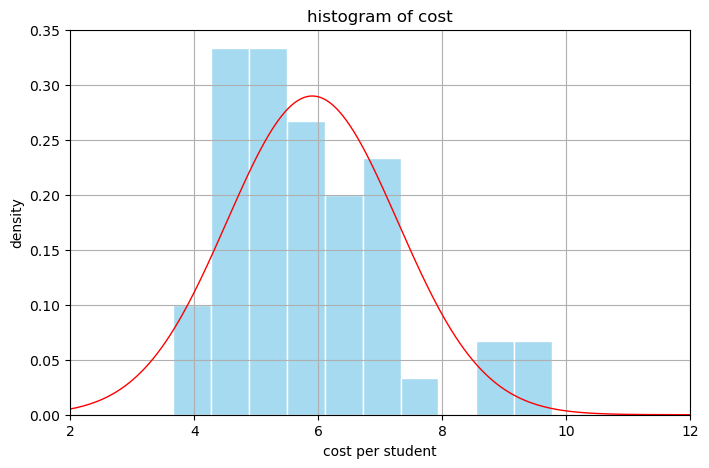

In [34]:
# Histogram of cost
x = data["COST"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat = "density", bins = 10, color = "skyblue", edgecolor = "white")
x2 = np.linspace(2,12,300)
plt.plot(x2, norm.pdf(x2, mean, std), color="red", linewidth = 1)
plt.xlim(2,12)
plt.ylim(0,0.35)
plt.xlabel("cost per student")
plt.ylabel("density")
plt.title("histogram of cost")
plt.grid(True)
plt.show()

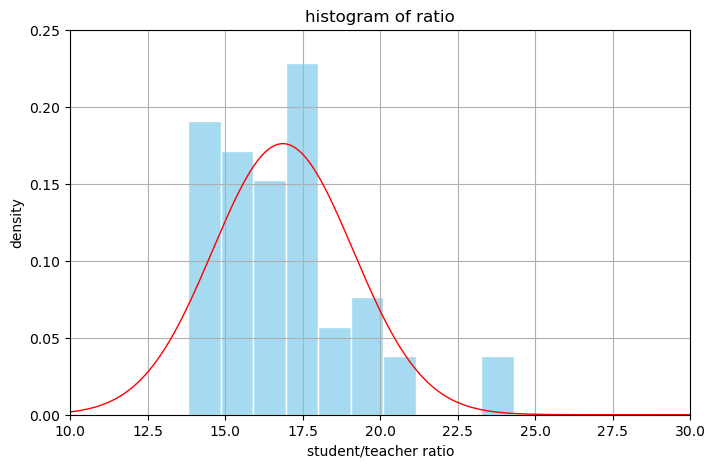

In [36]:
# Histogram of ratio
x = data["RATIO"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat = "density", bins = 10, color = "skyblue", edgecolor ="white")
x2 = np.linspace(10,30,300)
plt.plot(x2,norm.pdf(x2,mean,std), color = "red", linewidth = 1)
plt.xlim(10,30)
plt.ylim(0,0.25)
plt.xlabel("student/teacher ratio")
plt.ylabel("density")
plt.title("histogram of ratio")
plt.grid(True)
plt.show()

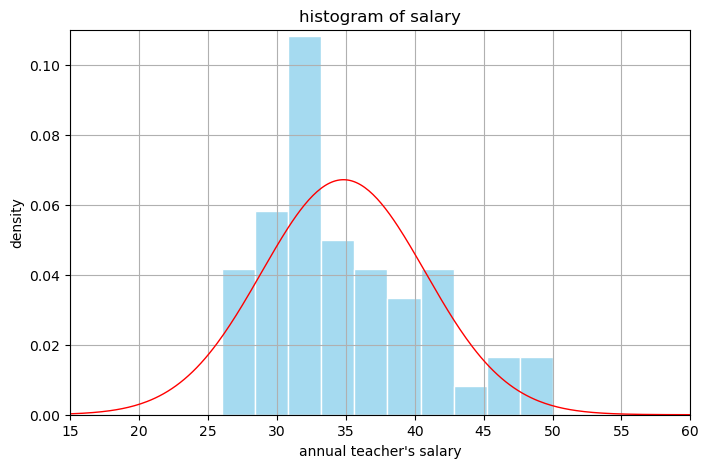

In [38]:
# Histogram of salary
x = data["SALARY"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat = "density", bins = 10, color = "skyblue", edgecolor ="white")
x2 =np.linspace(15,60,300)
plt.plot(x2,norm.pdf(x2, mean, std), color="red", linewidth =1 )
plt.xlim(15,60)
plt.ylim(0,0.11)
plt.xlabel("annual teacher's salary")
plt.ylabel("density")
plt.title("histogram of salary")
plt.grid(True)
plt.show()

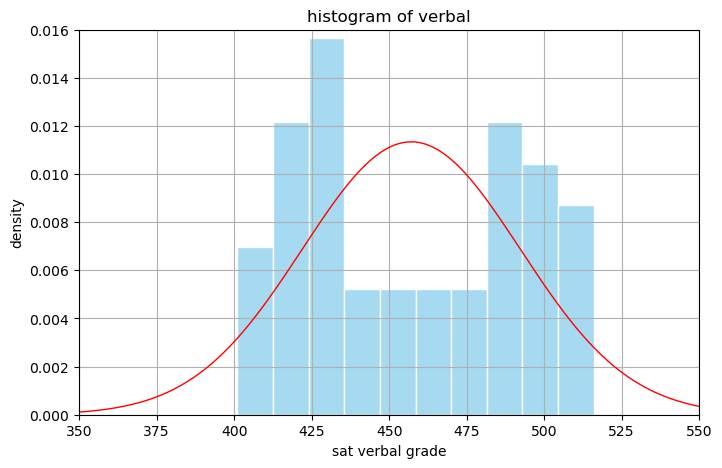

In [42]:
# Histogram of verbal
x = data["VERBAL"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat = "density", bins = 10, color="skyblue", edgecolor="white")
x2 = np.linspace(350,550,300)
plt.plot(x2,norm.pdf(x2,mean,std), color="red", linewidth = 1)
plt.xlim(350,550)
plt.ylim(0,0.016)
plt.xlabel("sat verbal grade")
plt.ylabel("density")
plt.title("histogram of verbal")
plt.grid(True)
plt.show()

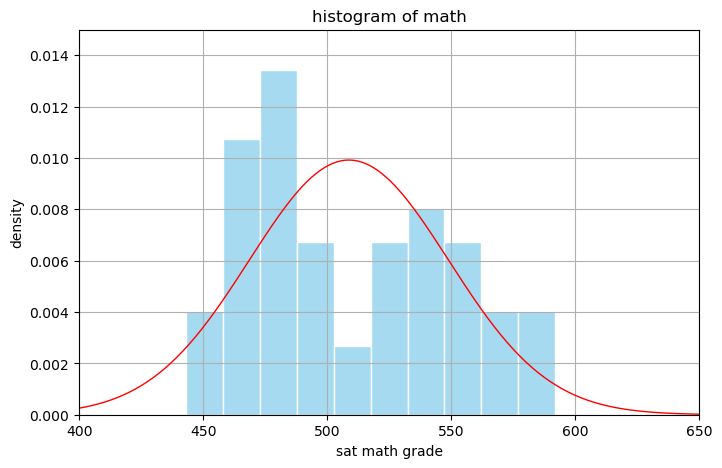

In [44]:
# Histogram of math
x = data["MATH"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x,stat = "density", bins=10, color="skyblue", edgecolor="white")
x2 = np.linspace(400,650,300)
plt.plot(x2,norm.pdf(x2,mean,std), color="red", linewidth = 1)
plt.xlim(400,650)
plt.ylim(0,0.015)
plt.xlabel("sat math grade")
plt.ylabel("density")
plt.title("histogram of math")
plt.grid(True)
plt.show()

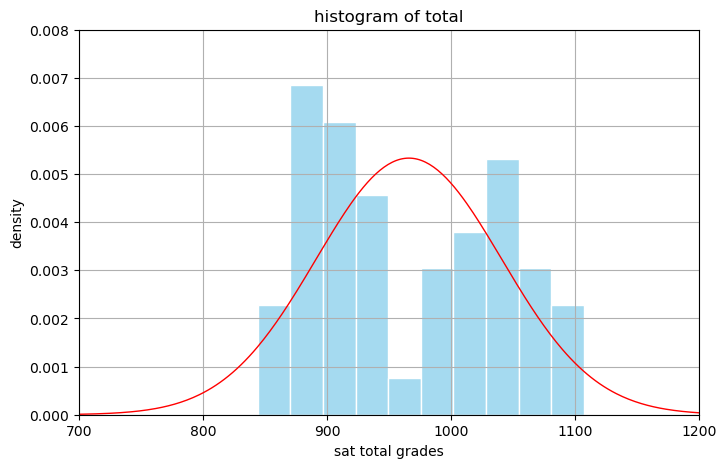

In [46]:
# Histogram of total
x = data["TOTAL"].dropna()
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat = "density", bins=10, color="skyblue", edgecolor="white")
x2 = np.linspace(700,1200,300)
plt.plot(x2,norm.pdf(x2,mean,std), color="red", linewidth = 1)
plt.xlim(700,1200)
plt.ylim(0,0.008)
plt.xlabel("sat total grades")
plt.ylabel("density")
plt.title("histogram of total")
plt.grid(True)
plt.show()

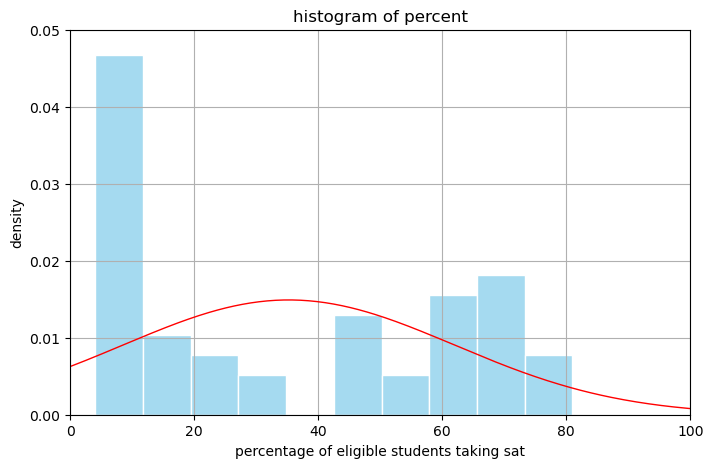

In [48]:
# Histogram of percent
x = data["PERCENT"]
mean = x.mean()
std = x.std()
plt.figure(figsize = (8,5))
sns.histplot(x, stat="density", bins=10, color="skyblue", edgecolor = "white")
x2 = np.linspace(0,100,300)
plt.plot(x2,norm.pdf(x2,mean,std), color="red", linewidth = 1)
plt.xlim(0,100)
plt.ylim(0,0.05)
plt.xlabel("percentage of eligible students taking sat")
plt.ylabel("density")
plt.title("histogram of percent")
plt.grid(True)
plt.show()

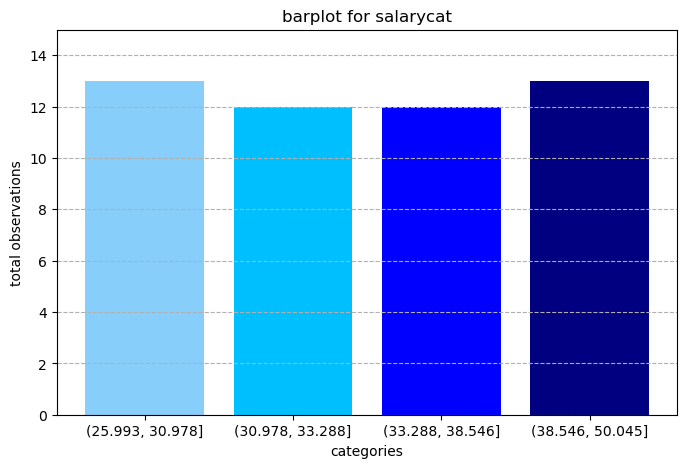

In [50]:
# barplot for salarycat
salary_counts = dataset["SALARYCAT"].value_counts().sort_index()
plt.figure(figsize =(8,5))
plt.bar(salary_counts.index.astype(str), salary_counts.values,
        color =["lightskyblue", "deepskyblue", "blue", "navy"])
plt.title("barplot for salarycat")
plt.xlabel("categories")
plt.ylabel("total observations")
plt.ylim(0,15)
plt.grid(axis="y", linestyle="--",alpha = 1)
plt.show()

In [52]:
# bivariate analysis
# TOTAL ~ SALARYCAT
anova_model = smf.ols('TOTAL~C(SALARYCAT)', data = dataset).fit()
anova_table = sm.stats.anova_lm(anova_model, typ = 2)
print(anova_table)

                     sum_sq    df       F    PR(>F)
C(SALARYCAT)   43556.327436   3.0  2.8943  0.045227
Residual      230751.352564  46.0     NaN       NaN


In [54]:
print(shapiro(anova_model.resid))

ShapiroResult(statistic=0.9768881468818609, pvalue=0.42944699807661424)


In [56]:
groups = [group["TOTAL"].values for name, group in dataset.groupby("SALARYCAT", observed = False)]
print(levene(*groups))

LeveneResult(statistic=1.1728740213325382, pvalue=0.33037570500147156)


In [58]:
anova_results = anova_lm(anova_model, type =2)
print(anova_results)

                df         sum_sq       mean_sq       F    PR(>F)
C(SALARYCAT)   3.0   43556.327436  14518.775812  2.8943  0.045227
Residual      46.0  230751.352564   5016.333751     NaN       NaN


In [60]:
t = pairwise_tukeyhsd(endog = dataset["TOTAL"], groups=dataset["SALARYCAT"], alpha = 0.05)
print(t)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj    lower    upper  reject
--------------------------------------------------------------------------
(25.993, 30.978] (30.978, 33.288] -39.4295 0.5115 -115.0046 36.1457  False
(25.993, 30.978] (33.288, 38.546] -47.0128 0.3572  -122.588 28.5623  False
(25.993, 30.978] (38.546, 50.045] -81.4615  0.026 -155.5098 -7.4133   True
(30.978, 33.288] (33.288, 38.546]  -7.5833 0.9936  -84.6552 69.4885  False
(30.978, 33.288] (38.546, 50.045] -42.0321 0.4561 -117.6072 33.5431  False
(33.288, 38.546] (38.546, 50.045] -34.4487 0.6206 -110.0239 41.1264  False
--------------------------------------------------------------------------


In [70]:
clean = data[["TOTAL","COST"]].dropna()

Spearman correlation : -0.3646, p-value : 0.0100
Spearman correlation : 0.0950, p-value : 0.5119
Spearman corr : -0.4026, p-value :  0.0038
Spearman corr:-0.8584, p-value:0.0000
Spearman corr:0.9832, p-value:0.0000
Spearman corr: 0.9865, p-value :  0.0000


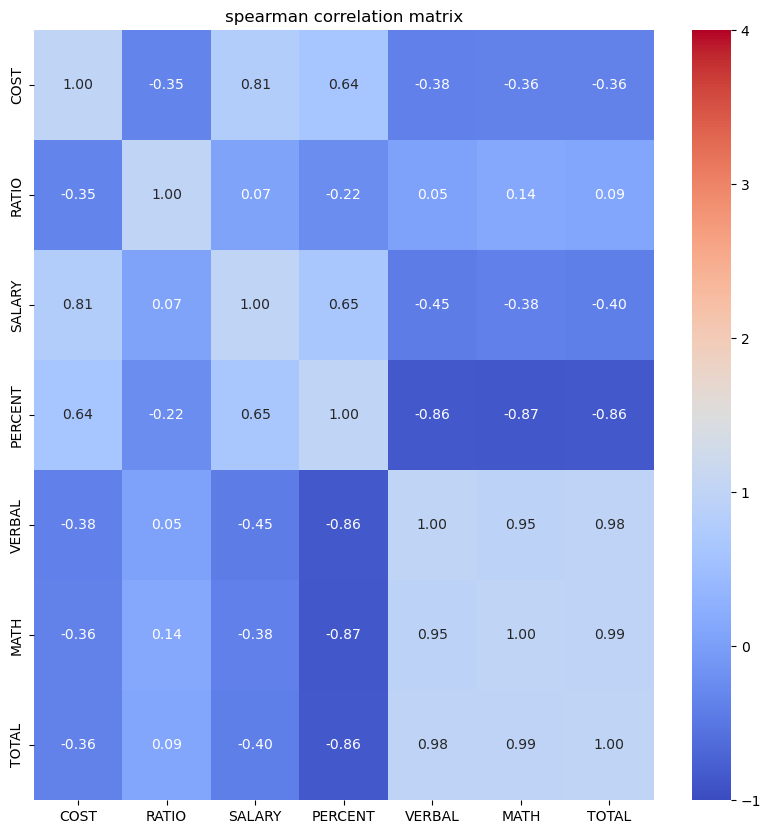

In [72]:
# Spearman correlations
corr, pval = spearmanr(clean["TOTAL"], clean["COST"])
print(f"Spearman correlation : {corr:.4f}, p-value : {pval:.4f}")
corr, pval = spearmanr(dataset["TOTAL"], dataset["RATIO"])
print(f"Spearman correlation : {corr:.4f}, p-value : {pval:.4f}")
corr, pval = spearmanr(dataset["TOTAL"], dataset["SALARY"])
print(f"Spearman corr : {corr:.4f}, p-value : {pval : .4f}")
corr, pval = spearmanr(dataset["TOTAL"], dataset["PERCENT"])
print(f"Spearman corr:{corr:.4f}, p-value:{pval:.4f}")
corr, pval = spearmanr(dataset["TOTAL"], dataset["VERBAL"])
print(f"Spearman corr:{corr:.4f}, p-value:{pval:.4f}")
corr, pval = spearmanr(dataset["TOTAL"], dataset["MATH"])
print(f"Spearman corr: {corr:.4f}, p-value : {pval : .4f}")
corr_spearman = data.corr(method = "spearman")
plt.figure (figsize = (10,10))
sns.heatmap(corr_spearman, annot = True, cmap = 'coolwarm', fmt = ".2f", vmin = -1, vmax = 4)
plt.title("spearman correlation matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     102.7
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.09e-17
Time:                        16:10:53   Log-Likelihood:                -238.04
No. Observations:                  49   AIC:                             482.1
Df Residuals:                      46   BIC:                             487.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    995.0314     21.645     45.970      0.0

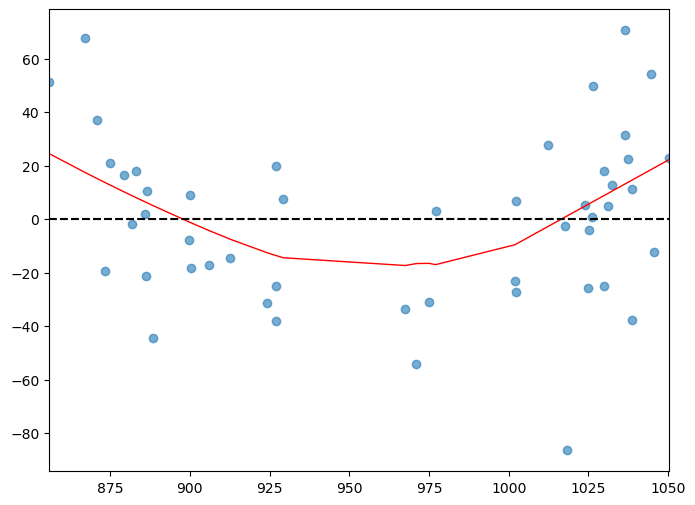

In [74]:
# Predictive or explanatory model
# after stepwise method which took place in R, best model is TOTAL~a + b*COST + c*PERCENT
model = smf.ols("TOTAL~COST+PERCENT", data = dataset).fit()
print(model.summary())
fit = model.fittedvalues
res = model.resid
plt.figure(figsize = (8,6))
sns.residplot(x = fit, y = res, lowess = True, line_kws = {'color' : 'red', 'lw' :1}, scatter_kws = {'alpha' : 0.6})
plt.axhline(0, color = "black", linestyle = "--")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     181.0
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.58e-22
Time:                        16:25:12   Log-Likelihood:                -226.17
No. Observations:                  49   AIC:                             458.3
Df Residuals:                      46   BIC:                             464.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1145.4822     16.375     69.955      

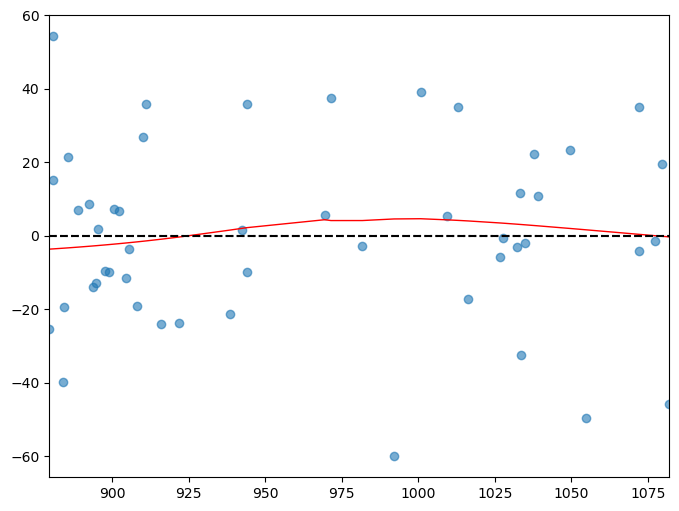

In [107]:
# Logarithm transformation for Percent
dataset["log_percent"] = np.log(dataset["PERCENT"])
model2 = smf.ols("TOTAL~COST + log_percent", data = dataset).fit()
print(model2.summary())
fit2 = model2.fittedvalues
res2 = model2.resid
plt.figure(figsize = (8,6))
sns.residplot(x = fit2, y = res2, lowess = True, line_kws = {'color' :'red', 'lw' :1}, scatter_kws = {'alpha':0.6})
plt.axhline(0,color = "black", linestyle="--")
plt.show()

shaprio - wilk statistic : 0.9871, p-value:0.8624


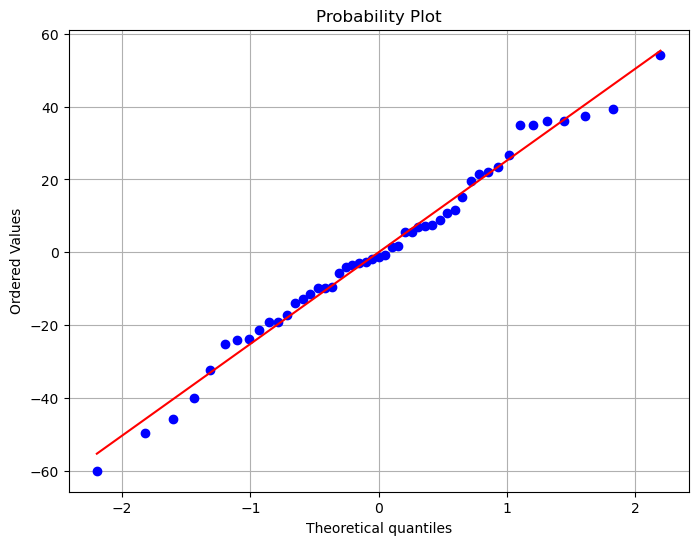

In [78]:
# Normality of the residuals
stat, p = shapiro(res2)
print(f"shaprio - wilk statistic : {stat:.4f}, p-value:{p:.4f}")
plt.figure(figsize = (8,6))
probplot(res2, dist = "norm", plot = plt)
plt.grid(True)
plt.show()

In [91]:
# Homoscedasticity
qfit2 = pd.qcut(fit2,q=4,duplicates = 'drop')
groups = [res2[qfit2 == cat] for cat in qfit2.unique()]
stat, p = levene(*groups)
print(f"levene statistic : {stat:.4f}, p-value :{p:.4f}")

levene statistic : 0.3353, p-value :0.7998
